<a href="https://colab.research.google.com/github/csarux/MLTests/blob/main/KerasTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import pandas 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import numpy as np

In [29]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

In [47]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

Instalar módulo para dar formato científico a los gráficos

In [4]:
pip install SciencePlots

  Created wheel for SciencePlots: filename=SciencePlots-1.0.6-cp36-none-any.whl size=4140 sha256=e2abc940fc5017a759d3203bd7aa65ee6f4ae2b20430b68ee89c583b732476d1
  Stored in directory: /root/.cache/pip/wheels/66/f8/97/c4d1f89a613feb90268bf62b192c3038e87e453d6d36b7726c
Successfully built SciencePlots


Configurar el estilo de los gráficos

In [5]:
# Para el light theme
# plt.style.use(['/root/.config/matplotlib/stylelib/science.mplstyle', '/root/.config/matplotlib/stylelib/notebook.mplstyle'])

# Para el lado oscuro
plt.style.use(['/root/.config/matplotlib/stylelib/science.mplstyle', '/root/.config/matplotlib/stylelib/notebook.mplstyle', '/root/.config/matplotlib/stylelib/high-vis.mplstyle', 'dark_background'])
mpl.rcParams['axes.facecolor']='333333'
mpl.rcParams['figure.facecolor']='222222'

Problema de clasificación: Distinguir entre vino blanco y tinto a partir de características del vino

In [6]:
# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [7]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


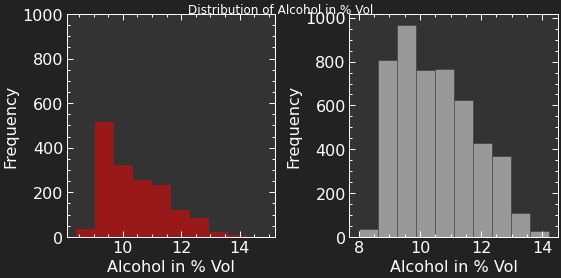

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

fig.tight_layout()

plt.show()

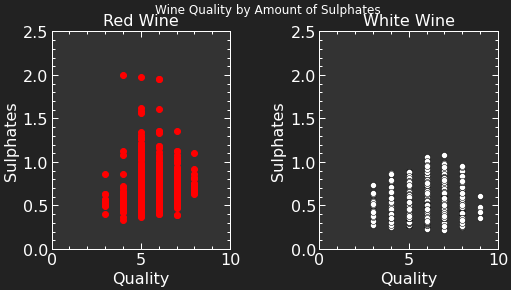

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

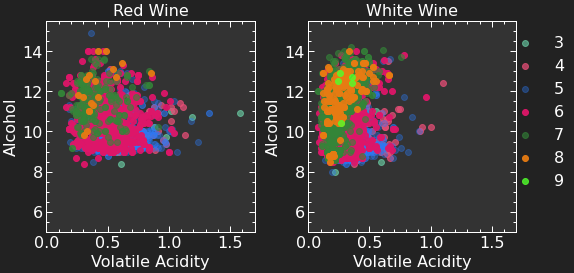

In [10]:
np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, color=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, color=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.tight_layout()

plt.show()

In [11]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [12]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [20]:
# Specify the data 
X=wines.iloc[:,0:11]

In [23]:
# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

In [21]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [24]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [48]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [49]:
# Model output shape
model.output_shape

(None, 1)

In [52]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.2623 - accuracy: 0.8758
Epoch 2/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0217 - accuracy: 0.9961
Epoch 3/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0202 - accuracy: 0.9965
Epoch 4/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0211 - accuracy: 0.9954
Epoch 5/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0297 - accuracy: 0.9950
Epoch 6/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0104 - accuracy: 0.9978
Epoch 7/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0113 - accuracy: 0.9981
Epoch 8/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0127 - accuracy: 0.9978
Epoch 9/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0093 - accuracy: 0.9987
Epoch 10/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.007

In [57]:
y_pred = model.predict(X_test)

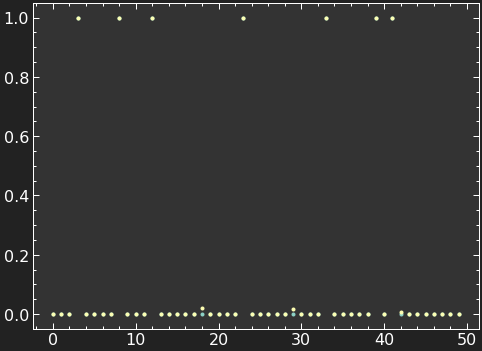

In [65]:
plt.plot(y_test[250:300], '.')
plt.plot(y_pred[250:300], '.')
plt.show()

In [64]:
y_pred

array([[1.0027260e-02],
       [9.8553526e-01],
       [6.7624736e-05],
       ...,
       [6.6572428e-04],
       [5.6570768e-04],
       [2.1197240e-05]], dtype=float32)

Problema de regresión para estimar la calidad del vino

In [71]:
# Isolate target labels
y = wines.quality

# Isolate data
X = wines.drop(columns='quality') 

In [74]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [79]:
# Scale the data with `StandardScaler`

# Define the scaler 
scaler = StandardScaler().fit(X)

# Scale the train set
X = scaler.transform(X)

In [80]:
# Initialize the model
model = Sequential()

# Add input layer 
model.add(Dense(64, input_dim=12, activation='relu'))
    
# Add output layer 
model.add(Dense(1))

In [83]:
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=1)

Epoch 1/10
163/163 [==============================] - 1s 1ms/step - loss: 17.5496 - mae: 3.8712
Epoch 2/10
163/163 [==============================] - 0s 1ms/step - loss: 1.5364 - mae: 0.9540
Epoch 3/10
163/163 [==============================] - 0s 1ms/step - loss: 1.0763 - mae: 0.7814
Epoch 4/10
163/163 [==============================] - 0s 1ms/step - loss: 0.7984 - mae: 0.6735
Epoch 5/10
163/163 [==============================] - 0s 1ms/step - loss: 0.6279 - mae: 0.6152
Epoch 6/10
163/163 [==============================] - 0s 1ms/step - loss: 0.5850 - mae: 0.5877
Epoch 7/10
163/163 [==============================] - 0s 1ms/step - loss: 0.5468 - mae: 0.5719
Epoch 8/10
163/163 [==============================] - 0s 1ms/step - loss: 0.5074 - mae: 0.5503
Epoch 9/10
163/163 [==============================] - 0s 1ms/step - loss: 0.5087 - mae: 0.5544
Epoch 10/10
163/163 [==============================] - 0s 1ms/step - loss: 0.5118 - mae: 0.5594
Epoch 1/10
163/163 [============================